# L4 - Supervised Learning

## 1) Wine Database
### 1.1) Create a notebook to read the database and make a dataframe out of it.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import math
from sklearn.preprocessing import *
from sklearn.metrics import *

In [2]:
# Reading database amd set column's name taken from wine.names :
dfWine = pd.read_csv("wine.data", sep=',', names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
# Have a look to the database :
dfWine.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [3]:
# Recovering all columns in a list and check the result : 
ls_Attributs = dfWine.columns
print(ls_Attributs)
for attribut in ls_Attributs:
    print(attribut)

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Class
Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline


### 1.2) Familiarized with the database. (Number of ; classes, attributs, attribut's stats, missing values, ...)

In [4]:
# Number of occurences for each attribut :
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
# Top 5 values :
dfWine.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [6]:
# Missing values ? :
dfWine.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
# Unique 'Class' :
dfWine['Class'].unique()

array([1, 2, 3], dtype=int64)

In [8]:
# Number of occurences for each class :
for x in range(1,4):
    print("Occurences for Class", x, "is :", sum(dfWine['Class'] == x) )

Occurences for Class 1 is : 59
Occurences for Class 2 is : 71
Occurences for Class 3 is : 48


#### 1.2) Answers :

        * We don't have missing values.
        * We have 3 different classes with ;
            - 59 occurences for Class1.
            - 71 occurences for Class2.
            - 48 occurences for Class3.
        * Despite the class, we have 13 other attributs (so 14 in total).
        * All values are in a good range, except the proline (at first).
          After looking up on the web, we found that the highest value of Proline is found in a French Colom at 
          value 3490mg/l. So the max value of 1680 can be a true value.

### 1.3) Boxplots/Scatterplots Analysis

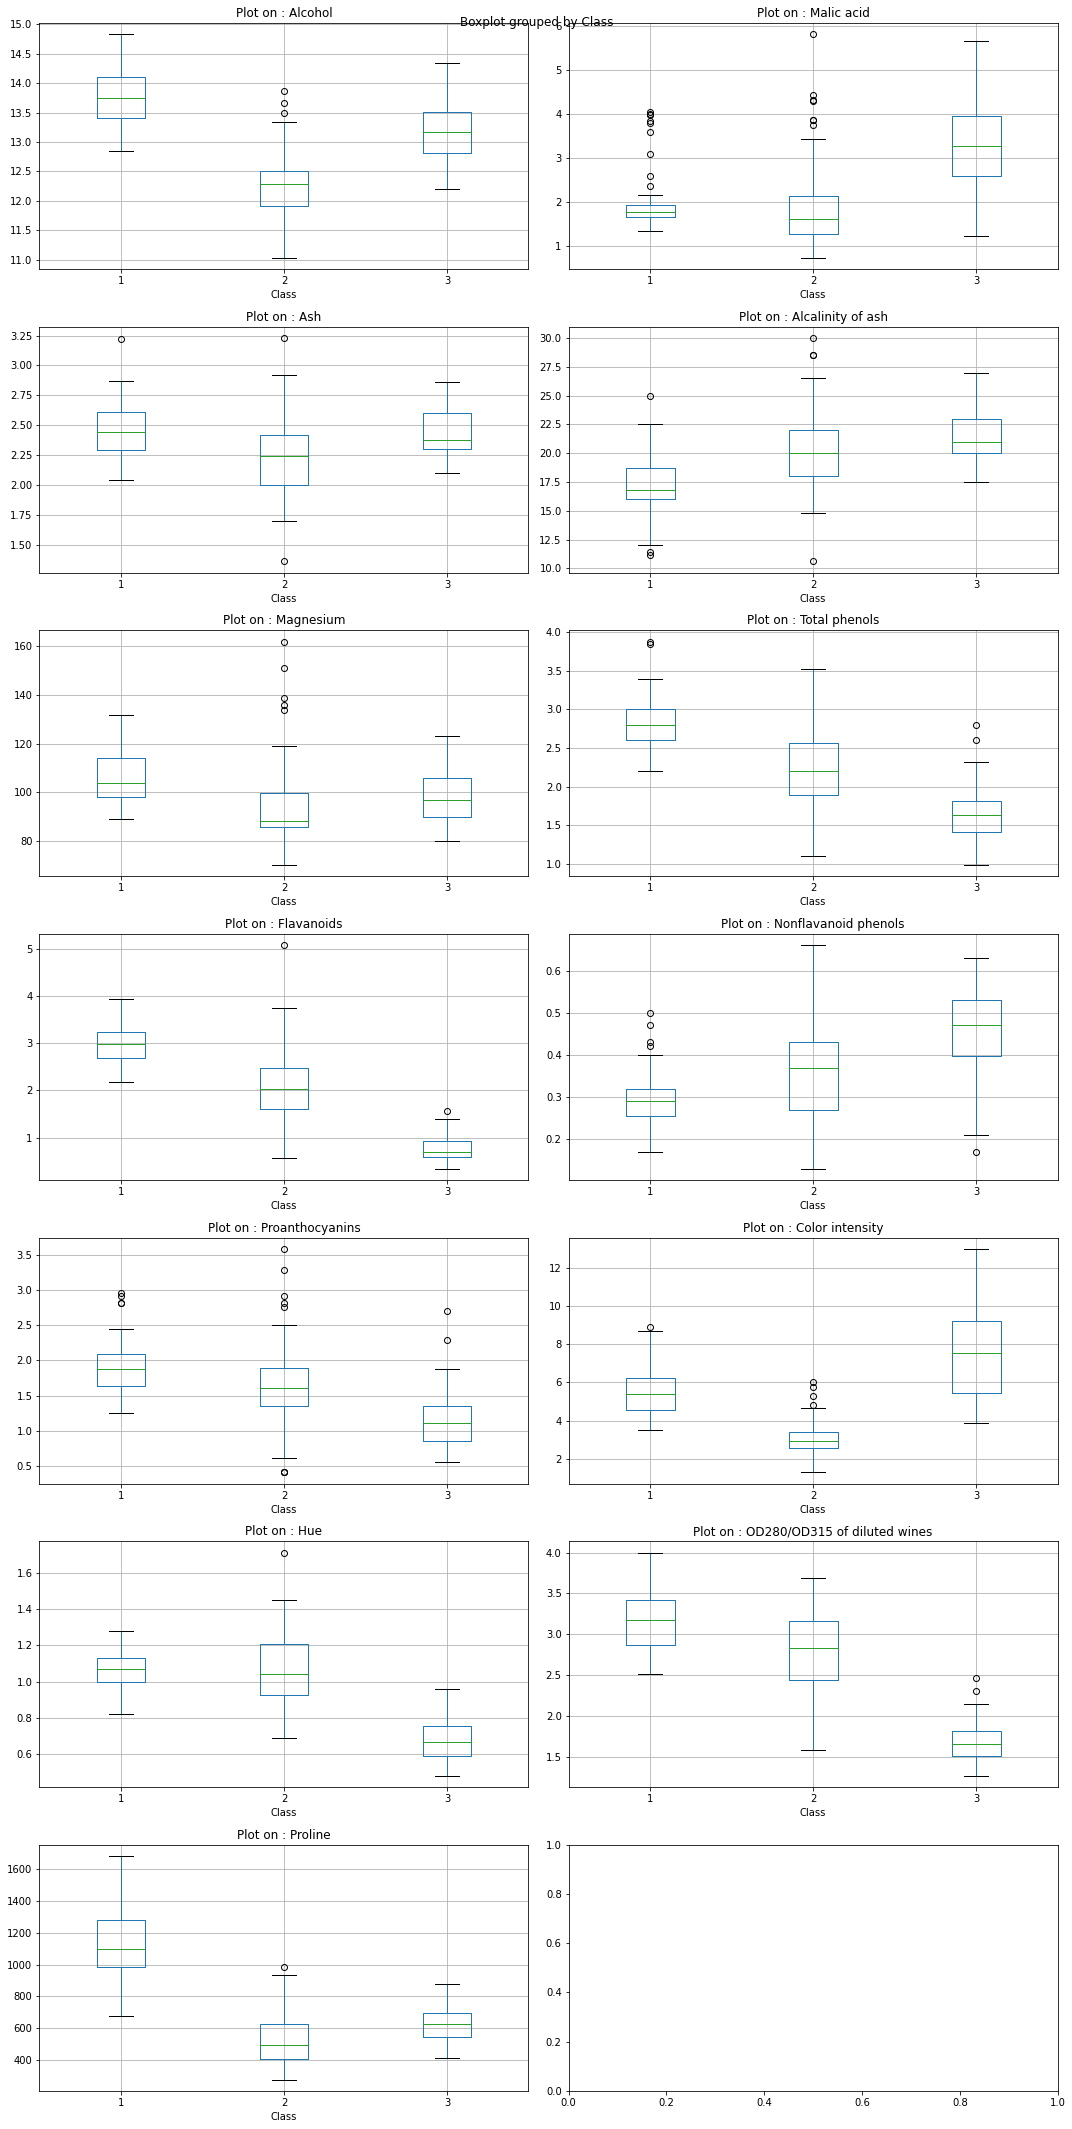

In [9]:
def displayBoxplot(df, lsAttributs):
    fig, axes = plt.subplots(7, 2, figsize=(15,30))
    axes=axes.flatten()
    
    # For each attribut, set subplot :
    for i, attribut in enumerate(lsAttributs):
        df.boxplot(attribut, by='Class', ax=axes[i])
        axes[i].set_title(f'Plot on : {attribut}')
    # Displaying fig.
    fig.tight_layout()
# Calling fn with every attributs except [0] being 'Class'.
displayBoxplot(dfWine, ls_Attributs[1:14])

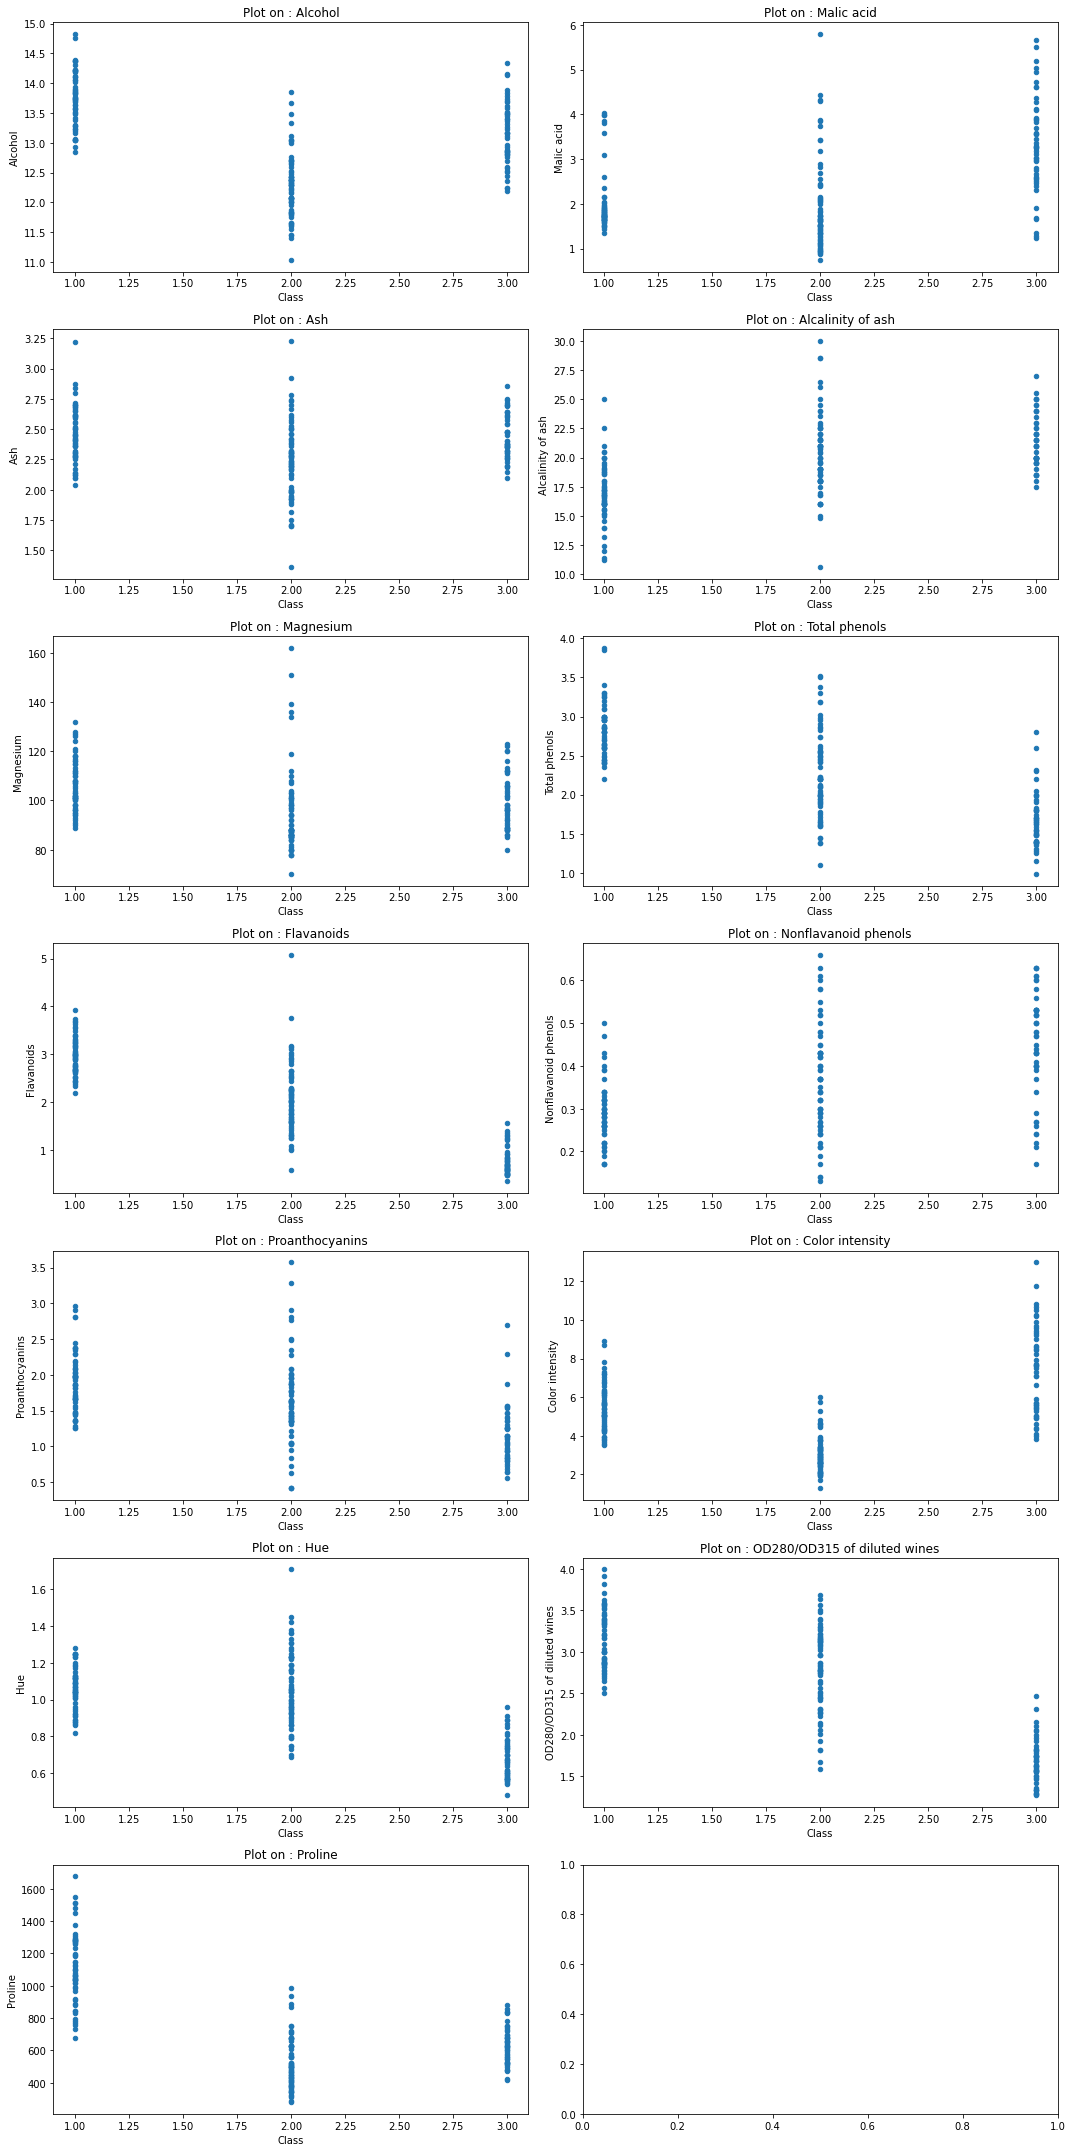

In [10]:
def displayScatterplot(df, lsAttributs):
    fig, axes = plt.subplots(7, 2, figsize=(15,30))
    axes=axes.flatten()
    
    # For each attribut, set subplot :
    for i, attribut in enumerate(lsAttributs):
        df.plot.scatter('Class', y=attribut, ax=axes[i])
        axes[i].set_title(f'Plot on : {attribut}')
    # Displaying fig.
    fig.tight_layout()
# Calling fn with every attributs except [0] being 'Class'.
displayScatterplot(dfWine, ls_Attributs[1:14])

 ### Observations :
    * We can see that some attributs won't help us to make any class distinction because the value are too confused. That's
      mainly the case for Ash and Nonflavanoid Phenols. 
    * The attribut 'OD280/OD315' of diluted wines clearly gives us an attribut that can identify Class1 of Class3.
    * By taking the attribut 'Proline' we have a better chance to separate Class1 of Class2.
    * 'Color intensity' is the best attribut to gives us the Class between 2 & 3.
### Conclusion : 
    * Those 3 attributs will be our main attributs to make our identifying conditions.

## 2) Model rules based
### Use boxplots on attributs that have a majority of different values for each class in order to code some rules (if-then-else) that will classified each observation. 
#### a) Try on at least 3 attributs individually.
#### b) 2 qualifiers on multiple attributs and measure the numbers of correct observations (accuracy).

#### a) --------------------------------------------------------------->

In [11]:
def printCounters(cntrC1_True, cntrC1_False, cntrC2asC1, cntrC3asC1, cntrC2_True, cntrC2_False, cntrC1asC2, cntrC3asC2, cntrC3_True, cntrC3_False, cntrC1asC3, cntrC2asC3):
    print('Detected as Class1 :', cntrC1_True + cntrC1_False, '(real number is 59)')
    print('Number of TRUE occurences detected as Class1  :', cntrC1_True)
    print('Number of FALSE occurences detected as Class1 :', cntrC1_False)
    print('With :', cntrC2asC1, 'from C2.')
    print('      ', cntrC3asC1, 'from C3.')
    print()
    print('Detected as Class2 :', cntrC2_True + cntrC2_False, '(real number is 71)')
    print('Number of TRUE occurences detected as Class2  :', cntrC2_True)
    print('Number of FALSE occurences detected as Class2 :', cntrC2_False)
    print('With :', cntrC1asC2, 'from C1.')
    print('      ', cntrC3asC2, 'from C3.')
    print()
    print('Detected as Class3 :', cntrC3_True + cntrC3_False, '(real number is 48)')
    print('Number of TRUE occurences detected as Class3  :', cntrC3_True)
    print('Number of FALSE occurences detected as Class3 :', cntrC3_False)
    print('With :', cntrC1asC3, 'from C1.')
    print('      ', cntrC2asC3, 'from C2.')
    print()
    print('Total occurences :', cntrC1_True + cntrC1_False + cntrC2_True + cntrC2_False + cntrC3_True + cntrC3_False)

In [12]:
def indexForClass1(idx, cntrTrue, cntrFalse, cnt_other1, cnt_other2):
    if idx <= 58:
        cntrTrue += 1
    else:
        cntrFalse += 1
        if idx <= 129:
            cnt_other1 += 1
        else:
            cnt_other2 += 1
    return cntrTrue, cntrFalse, cnt_other1, cnt_other2

def indexForClass2(idx, cntrTrue, cntrFalse, cnt_other1, cnt_other2):
    if idx > 58 and idx <= 129:
        cntrTrue += 1
    else:
        cntrFalse += 1
        if idx <= 58:
            cnt_other1 += 1
        else:
            cnt_other2 += 1
    return cntrTrue, cntrFalse, cnt_other1, cnt_other2

def indexForClass3(idx, cntrTrue, cntrFalse, cnt_other1, cnt_other2):
    if idx > 129:
        cntrTrue += 1
    else:
        cntrFalse += 1
        if idx <= 58:
            cnt_other1 += 1
        else:
            cnt_other2 += 1
    return cntrTrue, cntrFalse, cnt_other1, cnt_other2

In [13]:
df_Alcalinity = dfWine['Alcalinity of ash']

cnt_C1_True=0
cnt_C1_False=0
cnt_C2_as_C1=0
cnt_C3_as_C1=0

cnt_C2_True=0
cnt_C2_False=0
cnt_C1_as_C2=0
cnt_C3_as_C2=0

cnt_C3_True=0
cnt_C3_False=0
cnt_C1_as_C3=0
cnt_C2_as_C3=0

idx=0

for value in df_Alcalinity:
    if value <= 17.5:
        cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1 = indexForClass1(idx, cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1)
    elif value >= 21.5:
        cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3 = indexForClass3(idx, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)
    else:
        cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(idx, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)
    idx += 1

printCounters(cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)

Detected as Class1 : 51 (real number is 59)
Number of TRUE occurences detected as Class1  : 38
Number of FALSE occurences detected as Class1 : 13
With : 12 from C2.
       1 from C3.

Detected as Class2 : 78 (real number is 71)
Number of TRUE occurences detected as Class2  : 35
Number of FALSE occurences detected as Class2 : 43
With : 19 from C1.
       24 from C3.

Detected as Class3 : 49 (real number is 48)
Number of TRUE occurences detected as Class3  : 23
Number of FALSE occurences detected as Class3 : 26
With : 2 from C1.
       24 from C2.

Total occurences : 178


Accuracy for Class1: TP = 38, TN = 71 + 48 - 19 - 2 = 98
* => Accuracy = (TP + TN)/Total = (38+98)/178 = 0.76\
Accuracy for Class2: TP = 35, TN = 59 + 48 - 12 - 24 = 71
* => Accuracy = (TP + TN)/Total = (35+71)/178 = 0.59\
Accuracy for Class3: TP = 23, TN = 59 + 71 - 1 - 24 = 105
* => Accuracy = (TP + TN)/Total = (23+105)/178 = 0.71

In [14]:
df_Alcohol = dfWine['Alcohol']

cnt_C1_True=0
cnt_C1_False=0
cnt_C2_as_C1=0
cnt_C3_as_C1=0

cnt_C2_True=0
cnt_C2_False=0
cnt_C1_as_C2=0
cnt_C3_as_C2=0

cnt_C3_True=0
cnt_C3_False=0
cnt_C1_as_C3=0
cnt_C2_as_C3=0

idx=0

for value in df_Alcohol:
    if value <= 12.5:
        cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(idx, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)
    elif value >= 13.5:
        cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1 = indexForClass1(idx, cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1)
    else:
        cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3 = indexForClass3(idx, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)
    idx += 1

printCounters(cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)

Detected as Class1 : 57 (real number is 59)
Number of TRUE occurences detected as Class1  : 42
Number of FALSE occurences detected as Class1 : 15
With : 2 from C2.
       13 from C3.

Detected as Class2 : 57 (real number is 71)
Number of TRUE occurences detected as Class2  : 52
Number of FALSE occurences detected as Class2 : 5
With : 0 from C1.
       5 from C3.

Detected as Class3 : 64 (real number is 48)
Number of TRUE occurences detected as Class3  : 30
Number of FALSE occurences detected as Class3 : 34
With : 17 from C1.
       17 from C2.

Total occurences : 178


Accuracy for Class1: TP = 42, TN = 71 + 48 - 0 - 17 = 102
* => Accuracy = (TP + TN)/Total = (42+102)/178 = 0.80\
Accuracy for Class2: TP = 52, TN = 59 + 48 - 2 - 17 = 88
* => Accuracy = (TP + TN)/Total = (52+88)/178 = 0.78\
Accuracy for Class3: TP = 30, TN = 59 + 71 - 13 - 5 = 112
* => Accuracy = (TP + TN)/Total = (30+112)/178 = 0.79

In [15]:
df_Color = dfWine['Color intensity']

cnt_C1_True=0
cnt_C1_False=0
cnt_C2_as_C1=0
cnt_C3_as_C1=0

cnt_C2_True=0
cnt_C2_False=0
cnt_C1_as_C2=0
cnt_C3_as_C2=0

cnt_C3_True=0
cnt_C3_False=0
cnt_C1_as_C3=0
cnt_C2_as_C3=0

idx=0

for value in df_Color:
    if value <= 4:
        cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(idx, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)
    elif value >= 6:
        cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3 = indexForClass3(idx, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)
    else:
        cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1 = indexForClass1(idx, cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1)
    idx += 1

printCounters(cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)

Detected as Class1 : 57 (real number is 59)
Number of TRUE occurences detected as Class1  : 32
Number of FALSE occurences detected as Class1 : 25
With : 8 from C2.
       17 from C3.

Detected as Class2 : 71 (real number is 71)
Number of TRUE occurences detected as Class2  : 62
Number of FALSE occurences detected as Class2 : 9
With : 7 from C1.
       2 from C3.

Detected as Class3 : 50 (real number is 48)
Number of TRUE occurences detected as Class3  : 29
Number of FALSE occurences detected as Class3 : 21
With : 20 from C1.
       1 from C2.

Total occurences : 178


Accuracy for Class1: TP = 32, TN = 71 + 48 - 7 - 20 = 92
* => Accuracy = (TP + TN)/Total = (32+92)/178 = 0.69\
Accuracy for Class2: TP = 62, TN = 59 + 48 - 8 - 1 = 98
* => Accuracy = (TP + TN)/Total = (62+98)/178 = 0.89\
Accuracy for Class3: TP = 29, TN = 59 + 71 - 17 - 2 = 111
* => Accuracy = (TP + TN)/Total = (29+111)/178 = 0.78

#### b) --------------------------------------------------------------->

In [16]:
df_TotalPhenol = dfWine['Total phenols'] # Premier critere de seaparation
df_Proline = dfWine['Proline'] # Deuxieme critere de seaparation

cnt_C1_True=0
cnt_C1_False=0
cnt_C2_as_C1=0
cnt_C3_as_C1=0

cnt_C2_True=0
cnt_C2_False=0
cnt_C1_as_C2=0
cnt_C3_as_C2=0

cnt_C3_True=0
cnt_C3_False=0
cnt_C1_as_C3=0
cnt_C2_as_C3=0

for i in range(0,178):
    if df_TotalPhenol[i] < 2.3:
        if df_Color[i] > 4.2:
            cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3 = indexForClass3(i, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)
        else:
            cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(i, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)
    else:
        if df_Proline[i] > 800:
            cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1 = indexForClass1(i, cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1)
        else:
            cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(i, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)

printCounters(cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)

Detected as Class1 : 55 (real number is 59)
Number of TRUE occurences detected as Class1  : 52
Number of FALSE occurences detected as Class1 : 3
With : 3 from C2.
       0 from C3.

Detected as Class2 : 77 (real number is 71)
Number of TRUE occurences detected as Class2  : 64
Number of FALSE occurences detected as Class2 : 13
With : 6 from C1.
       7 from C3.

Detected as Class3 : 46 (real number is 48)
Number of TRUE occurences detected as Class3  : 41
Number of FALSE occurences detected as Class3 : 5
With : 1 from C1.
       4 from C2.

Total occurences : 178


Accuracy for Class1: TP = 52, TN = 71 + 48 - 6 - 1 = 112
* => Accuracy = (TP + TN)/Total = (52+112)/178 = 0.92\
Accuracy for Class2: TP = 64, TN = 59 + 48 - 3 - 1 = 103
* => Accuracy = (TP + TN)/Total = (64+103)/178 = 0.93\
Accuracy for Class3: TP = 41, TN = 59 + 71 - 0 - 7 = 123
* => Accuracy = (TP + TN)/Total = (41+123)/178 = 0.92

In [17]:
df_OD = dfWine['OD280/OD315 of diluted wines'] # Troisieme critere de seaparation

cnt_C1_True=0
cnt_C1_False=0
cnt_C2_as_C1=0
cnt_C3_as_C1=0

cnt_C2_True=0
cnt_C2_False=0
cnt_C1_as_C2=0
cnt_C3_as_C2=0

cnt_C3_True=0
cnt_C3_False=0
cnt_C1_as_C3=0
cnt_C2_as_C3=0

for i in range(0,178):
    if df_OD[i] < 2.5:
        if df_Color[i] > 4.2:
            cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3 = indexForClass3(i, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)
        else:
            cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(i, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)
    else:
        if df_Proline[i] > 800:
            cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1 = indexForClass1(i, cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1)
        else:
            cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2 = indexForClass2(i, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2)

printCounters(cnt_C1_True, cnt_C1_False, cnt_C2_as_C1, cnt_C3_as_C1, cnt_C2_True, cnt_C2_False, cnt_C1_as_C2, cnt_C3_as_C2, cnt_C3_True, cnt_C3_False, cnt_C1_as_C3, cnt_C2_as_C3)

Detected as Class1 : 56 (real number is 59)
Number of TRUE occurences detected as Class1  : 53
Number of FALSE occurences detected as Class1 : 3
With : 3 from C2.
       0 from C3.

Detected as Class2 : 73 (real number is 71)
Number of TRUE occurences detected as Class2  : 64
Number of FALSE occurences detected as Class2 : 9
With : 6 from C1.
       3 from C3.

Detected as Class3 : 49 (real number is 48)
Number of TRUE occurences detected as Class3  : 45
Number of FALSE occurences detected as Class3 : 4
With : 0 from C1.
       4 from C2.

Total occurences : 178


Accuracy for Class1: TP = 53, TN = 71 + 48 - 6 - 0 = 113
* => Accuracy = (TP + TN)/Total = (53+113)/178 = 0.93\
Accuracy for Class2: TP = 64, TN = 59 + 48 - 3 - 4 = 100
* => Accuracy = (TP + TN)/Total = (64+100)/178 = 0.92\
Accuracy for Class3: TP = 45, TN = 59 + 71 - 0 - 3 = 130
* => Accuracy = (TP + TN)/Total = (45+130)/178 = 0.98

With this experience, we can clearly see that the accuracy is greatly increased by using more than one parameter to classify the different wines.

## 3. k-Nearest Neighbours (k-NN)

In [18]:
# Set 'Class' as the last column before normalizing :
dfWine = dfWine[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline', 'Class']]
dfWine.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            Class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [19]:
# Fn() for Hold-out validation :
## Ref. pg 9 of the chapter7.
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        idx = random.randrange(len(dataset_copy))
        train.append(dataset_copy.pop(idx))
    return train, dataset_copy

## Ref. pg 11 of the chapter7.
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            idx = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(idx))
        dataset_split.append(fold)
    return dataset_split

In [20]:
# Fn() for kNN algorithm : STEP by STEP :
## Ref. pg 23 of the chapter6.
## Step1 : Euclidean distace 
def euclidean_distance(row1, row2):
    distance =0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2
    return math.sqrt(distance)

## Step2 : find nearest neighbour(s)
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

## Step3 : Prediction
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

## Step4 : Accuracy
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

## Step5 : Call previous function train_test_split().

In [21]:
# Prediction using the previous predict_classification fn() 
def prediction_with_list(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

In [22]:
# Normalizing values.
#scaler = StandardScaler()
#dfWine[dfWine.columns.difference(['Class'])] = scaler.fit_transform(dfWine[dfWine.columns.difference(['Class'])])

normalized_df = dfWine.copy()
normalized_df = (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
normalized_df['Class'] = dfWine['Class']

normalized_df.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.000000    0.000000              0.000000         0.000000   
25%         0.262931    0.182489              0.264151         0.264984   
50%         0.474138    0.378692              0.396226         0.361199   
75%         0.627586    0.534810              0.580189         0.485804   
max         1.000000    1.000000              1.000000         1.000000   

       Color intensity         Hue  OD280/OD315 of diluted wines     Proline  \
count       178.000000  178.000000                    178.000000  178.000000   
mean          0.322363    0.388170                      0.491460    0.334446   
std           0.197806    0.185831                      0.260070    0.224613   
min           0.000000    0.000000                      0.000000    0.000000   
25%           0.165529    0.245935                      0.244505    0.158702   
50%           0.290956    0.394309                      0.553114    0.282097   
75%           0.419795    0.520325                      0.695971    0.504280   
max           1.000000    1.000000                      1.000000    1.000000   

            Class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [23]:
# df_ListFomrat = list(dfWine) # Set a list with only the columns' names.
df_ListFormat = normalized_df.to_numpy().tolist() # Transform our dataFrame into a list.

In [24]:
# Array containing every condition for k.
array_kValues = [1,2,3,5,7,10]

In [35]:
random.seed(1) # Randrange() seed.

ls_holdOutResults = list()

for k in array_kValues:
    accuracy = 0
    for i in range(10):
        train, copy = train_test_split(df_ListFormat)
        predict_Return = prediction_with_list(train, copy, k)
        actual_data_classes = list(sub_val[-1] for sub_val in copy)
        accuracy += accuracy_metric(actual_data_classes, predict_Return) / 10
    print(accuracy)
    ls_holdOutResults.append(accuracy)

94.78873239436619
94.3661971830986
95.07042253521126
95.77464788732395
96.19718309859155
95.49295774647888


In [36]:
random.seed(1) # Randrange() seed.

listFormat_split = cross_validation_split(df_ListFormat, 5)

exp0 = listFormat_split[1] + listFormat_split[2] + listFormat_split[3] + listFormat_split[4]
exp1 = listFormat_split[0] + listFormat_split[2] + listFormat_split[3] + listFormat_split[4]
exp2 = listFormat_split[0] + listFormat_split[1] + listFormat_split[3] + listFormat_split[4]
exp3 = listFormat_split[0] + listFormat_split[1] + listFormat_split[2] + listFormat_split[4]
exp4 = listFormat_split[0] + listFormat_split[1] + listFormat_split[2] + listFormat_split[3]

exps = [exp0, exp1, exp2, exp3, exp4]

ls_crossValidationResults = list()

for k in array_kValues:
    accuracy = 0
    for i in range(5):
        predict_Return = prediction_with_list(exps[i], listFormat_split[i], k)
        actual_data_classes = list(sub_val[-1] for sub_val in listFormat_split[i])
        accuracy += accuracy_metric(actual_data_classes, predict_Return) / 5
    print(accuracy)
    ls_crossValidationResults.append(accuracy)

95.42857142857143
94.85714285714286
95.42857142857143
95.42857142857142
94.85714285714285
97.14285714285714


In [37]:
print('| k | Hold-out | Cross validation |')
print('|---|---|---|')
for i, k_value in enumerate(array_kValues):
    print('|', k_value, '|', ls_holdOutResults[i], '|', ls_crossValidationResults[i], '|')

| k | Hold-out | Cross validation |
|---|---|---|
| 1 | 94.78873239436619 | 95.42857142857143 |
| 2 | 94.3661971830986 | 94.85714285714286 |
| 3 | 95.07042253521126 | 95.42857142857143 |
| 5 | 95.77464788732395 | 95.42857142857142 |
| 7 | 96.19718309859155 | 94.85714285714285 |
| 10 | 95.49295774647888 | 97.14285714285714 |


| k | Hold-out | Cross validation |
|---|---|---|
| 1 | 94.78873239436619 | 95.42857142857143 |
| 2 | 94.3661971830986 | 94.85714285714286 |
| 3 | 95.07042253521126 | 95.42857142857143 |
| 5 | 95.77464788732395 | 95.42857142857142 |
| 7 | 96.19718309859155 | 94.85714285714285 |
| 10 | 95.49295774647888 | 97.14285714285714 |

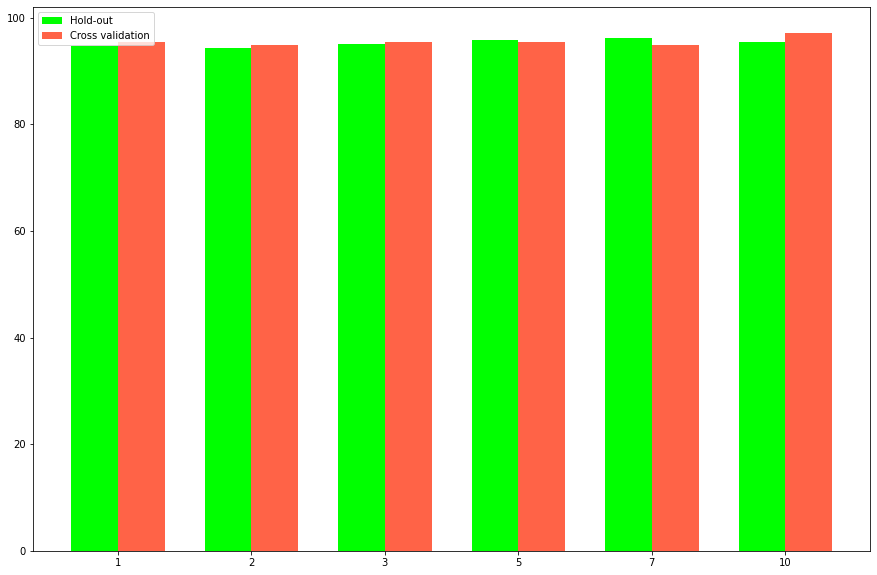

In [27]:
# Bargraph :
## Set bar width
barWidth=0.35

## Set plot size
plt.figure(figsize=(15,10))

x = np.arange(len(array_kValues))
plt.bar(x - barWidth/2, ls_holdOutResults, color='lime', width=barWidth, label='Hold-out')
plt.bar(x + barWidth/2, ls_crossValidationResults, color='tomato', width=barWidth, label='Cross validation')

## Legend :
ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels(array_kValues)
plt.legend()

We can see that both methods are similar in term of results, but with a k of 10, the cross validation is better. For other measurements, both method are similar but there is a trend going in favor of cross validation.\
The highest accuracy value found was when the k = 10 with a result of 97.14 in cross validation, this doesn't mean that a big k is better, because if k is too big, we lose variable locality.

## 4. Models ratings

In [28]:
def addMattrix3x3(matrix1, matrix2):
    for line in range(3):
        for column in range(3):
            matrix1[column][line] = matrix1[column][line] + matrix2[column][line]
    return matrix1

matrixAddRes = [[0,0,0],
                [0,0,0],
                [0,0,0]]

for i in range(5):
    predict_Return = prediction_with_list(exps[i], listFormat_split[i], k)
    actual_data_classes = list(sub_val[-1] for sub_val in listFormat_split[i])
    accuracy += accuracy_metric(actual_data_classes, predict_Return) / 5
    confMatrix_Res = confusion_matrix(actual_data_classes, predict_Return)
    matrixAddRes = addMattrix3x3(matrixAddRes, confMatrix_Res)
    print('Experience n°', i, '\n', confMatrix_Res)

print()
print('Matrix Addition result :')
for line in range(3):
    print(matrixAddRes[line])
    

Experience n° 0 
 [[13  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Experience n° 1 
 [[ 8  0  0]
 [ 2 14  0]
 [ 0  0 11]]
Experience n° 2 
 [[10  0  0]
 [ 0 14  0]
 [ 0  0 11]]
Experience n° 3 
 [[ 7  0  0]
 [ 1 15  1]
 [ 0  0 11]]
Experience n° 4 
 [[20  0  0]
 [ 0 10  1]
 [ 0  0  4]]

Matrix Addition result :
[58, 0, 0]
[3, 66, 2]
[0, 0, 46]


With the result 'Matrix Addition result', we can see that the Class2 is the least identified, because there is more false negative values. That comes from the fact that Class2 has more common values with other classes (most of the time Class2 is between Class1 & Class3).

## 5. LVQ Algorithm

In [29]:
## Ref. pg 16 of the chapter8.
# Locate the best matching unit :
def get_best_matching_unit(codebook, test_row):
    distances = list()
    for codevector in codebook:
        dist = euclidean_distance(codevector, test_row)
        distances.append((codevector, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]

# Create a random codebook vector
def init_codevector(train, category):
    n_records = len(train)
    n_features = len(train[0]) - 1
    found = False
    while(not found):
        random_observation = random.randrange(n_records)
        if(train[random_observation][-1] == category):
            found = True
    codevector = [train[random_observation][i] for i in range(n_features)]
    codevector.append(category)
    return codevector

# Train a set of codebook vectors : 
def train_codebook(train, classVector, lrate, epochs):
    codebook = [init_codevector(train,i+1) for i in range(classVector)]
    #print(codebook)
    for epoch in range(epochs):
        rate = lrate * (1.0 - (epoch/float(epochs)))
        sum_error = 0.0
        random.shuffle(train)
        for row in train:
            bmu = get_best_matching_unit(codebook, row)
            for i in range(len(row) - 1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return codebook


In [30]:
# Transform our dataFrame into an array.
df_ListFormatLVQ = normalized_df.to_numpy()

In [31]:
random.seed(1) # Randrange() seed.

copy = dfWine.copy()
listFormat_split_LVQ = cross_validation_split(df_ListFormatLVQ, 5)
    
exp0_LVQ = listFormat_split[1] + listFormat_split[2] + listFormat_split[3] + listFormat_split[4]
exp1_LVQ = listFormat_split[0] + listFormat_split[2] + listFormat_split[3] + listFormat_split[4]
exp2_LVQ = listFormat_split[0] + listFormat_split[1] + listFormat_split[3] + listFormat_split[4]
exp3_LVQ = listFormat_split[0] + listFormat_split[1] + listFormat_split[2] + listFormat_split[4]
exp4_LVQ = listFormat_split[0] + listFormat_split[1] + listFormat_split[2] + listFormat_split[3]

exps_LVQ = [(exp0_LVQ,listFormat_split[0]), (exp1_LVQ,listFormat_split[1]), (exp2_LVQ,listFormat_split[2]) ,(exp3_LVQ,listFormat_split[3]) ,(exp4_LVQ,listFormat_split[4])]

predict_array = np.array([])
accuracy = 0
for i in exps_LVQ:
    codebook_Res = train_codebook(np.array(i[0]), 3, 0.2, 20)
    for splitted_wine in i[1]:
        predict_Return = predict_classification(codebook_Res, splitted_wine, 1)
        predict_array = np.append(predict_array, predict_Return)
    print()

>epoch=0, lrate=0.200, error=48.781
>epoch=1, lrate=0.190, error=41.602
>epoch=2, lrate=0.180, error=36.557
>epoch=3, lrate=0.170, error=25.294
>epoch=4, lrate=0.160, error=20.814
>epoch=5, lrate=0.150, error=21.506
>epoch=6, lrate=0.140, error=22.259
>epoch=7, lrate=0.130, error=23.468
>epoch=8, lrate=0.120, error=21.796
>epoch=9, lrate=0.110, error=20.632
>epoch=10, lrate=0.100, error=17.664
>epoch=11, lrate=0.090, error=9.273
>epoch=12, lrate=0.080, error=6.883
>epoch=13, lrate=0.070, error=3.592
>epoch=14, lrate=0.060, error=0.671
>epoch=15, lrate=0.050, error=0.648
>epoch=16, lrate=0.040, error=0.018
>epoch=17, lrate=0.030, error=0.000
>epoch=18, lrate=0.020, error=0.000
>epoch=19, lrate=0.010, error=0.000

>epoch=0, lrate=0.200, error=45.081
>epoch=1, lrate=0.190, error=33.225
>epoch=2, lrate=0.180, error=25.160
>epoch=3, lrate=0.170, error=14.747
>epoch=4, lrate=0.160, error=6.810
>epoch=5, lrate=0.150, error=4.570
>epoch=6, lrate=0.140, error=1.616
>epoch=7, lrate=0.130, error=

In [32]:
predict_array = np.reshape(predict_array, (5, len(predict_array) // 5))

In [33]:
matrixAddRes = [[0,0,0],
                [0,0,0],
                [0,0,0]]
global_accuracy = 0

for i in range(5):
    accuracy = 0
    expLvq = np.array(exps_LVQ[i][1], dtype=np.int32)
    accuracy += accuracy_metric(expLvq[:,13], predict_array[i])
    global_accuracy += accuracy
    print(accuracy)
    confMatrix_Res = confusion_matrix(expLvq[:,13], predict_array[i])
    matrixAddRes = addMattrix3x3(matrixAddRes, confMatrix_Res)
    print('Experience n°', i, '\n', confMatrix_Res)
    print()

print('Global accuracy :',global_accuracy / 5)
print('Matrix Addition result :')
for line in range(3):
    print(matrixAddRes[line])

77.14285714285715
Experience n° 0 
 [[13  0  0]
 [ 3  5  5]
 [ 0  0  9]]

82.85714285714286
Experience n° 1 
 [[ 8  0  0]
 [ 5 11  0]
 [ 1  0 10]]

88.57142857142857
Experience n° 2 
 [[10  0  0]
 [ 0 13  1]
 [ 2  1  8]]

100.0
Experience n° 3 
 [[ 7  0  0]
 [ 0 17  0]
 [ 0  0 11]]

94.28571428571428
Experience n° 4 
 [[20  0  0]
 [ 2  9  0]
 [ 0  0  4]]

Global accuracy : 88.57142857142857
Matrix Addition result :
[58, 0, 0]
[10, 55, 6]
[3, 1, 42]


In [34]:
random.seed(1) # Randrange() seed.

predict_array = np.array([])
accuracy = 0
for i in exps_LVQ:
    codebook_Res = train_codebook(np.array(i[0]), 3, 0.1, 5)
    for splitted_wine in i[1]:
        predict_Return = predict_classification(codebook_Res, splitted_wine, 1)
        predict_array = np.append(predict_array, predict_Return)
    print()

predict_array = np.reshape(predict_array, (5, len(predict_array) // 5))
matrixAddRes = [[0,0,0],
                [0,0,0],
                [0,0,0]]

global_accuracy = 0

for i in range(5):
    accuracy = 0
    expLvq = np.array(exps_LVQ[i][1], dtype=np.int32)
    accuracy += accuracy_metric(expLvq[:,13], predict_array[i])
    global_accuracy += accuracy
    print(accuracy)
    confMatrix_Res = confusion_matrix(expLvq[:,13], predict_array[i])
    matrixAddRes = addMattrix3x3(matrixAddRes, confMatrix_Res)
    print('Experience n°', i, '\n', confMatrix_Res)
    print()

print('Global accuracy :',global_accuracy / 5)
print('Matrix Addition result :')
for line in range(3):
    print(matrixAddRes[line])
    
# Parameters + Result : 
## lrate = 0.4 , epochs = 20 => 88.57142857142858
## lrate = 0.1 , epochs = 20 => 90.28571428571429
## lrate = 0.1 , epochs = 50 => 89.71428571428571
## lrate = 0.9 , epochs = 50 => 30.857142857142854
## lrate = 0.1 , epochs = 5 => 93.7142857142857
## lrate = 0.4 , epochs = 5 => 94.85714285714285

>epoch=0, lrate=0.100, error=46.340
>epoch=1, lrate=0.080, error=42.253
>epoch=2, lrate=0.060, error=40.437
>epoch=3, lrate=0.040, error=29.057
>epoch=4, lrate=0.020, error=18.051

>epoch=0, lrate=0.100, error=49.417
>epoch=1, lrate=0.080, error=29.614
>epoch=2, lrate=0.060, error=27.226
>epoch=3, lrate=0.040, error=26.904
>epoch=4, lrate=0.020, error=18.685

>epoch=0, lrate=0.100, error=44.354
>epoch=1, lrate=0.080, error=33.715
>epoch=2, lrate=0.060, error=22.685
>epoch=3, lrate=0.040, error=17.023
>epoch=4, lrate=0.020, error=8.581

>epoch=0, lrate=0.100, error=48.404
>epoch=1, lrate=0.080, error=35.714
>epoch=2, lrate=0.060, error=28.113
>epoch=3, lrate=0.040, error=25.103
>epoch=4, lrate=0.020, error=19.766

>epoch=0, lrate=0.100, error=44.319
>epoch=1, lrate=0.080, error=30.533
>epoch=2, lrate=0.060, error=26.264
>epoch=3, lrate=0.040, error=12.340
>epoch=4, lrate=0.020, error=6.262

94.28571428571428
Experience n° 0 
 [[12  1  0]
 [ 0 13  0]
 [ 0  1  8]]

94.28571428571428
Exper

## Conclusion 5. :
94.85714285714285 is the highest accuracy value we found using 5 epochs and a learning values of 0.4.

We saw by successives attempts that too many epochs doesn't change the result. Using a low lrate value give a better accuracy result.
### Comparisons with kNN
We saw that kNN algorithm has a better accuracy than the LVQ. 